## Fisher's Linear Discriminant
### For 2 Classes
Fisher's method can be viewed as a dimensionality reduction method, similar to principle component analysis. But the discrimination part comes when it tried to maximize the separation between the classes. The reduction in dimension can be incorporated as the projection of the input space into the line space, and this is done as follows $y = \underline{w}^T \underline{x}$, where is $\underline{x}$ is a vector of 2D and y is just a single dimension. The complete discussion of Fischer's method will be discussed as we go through the simulation



In [1]:
%matplotlib inline
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import matplotlib.gridspec
import pandas as pd
import seaborn as sns
import sklearn.model_selection

In [2]:
#Loading the blob dataset with two clusters
#X, y = sklearn.datasets.make_blobs(n_samples=1000, centers=2, cluster_std=6, n_features=10)
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)#75/25 split
data_train = pd.DataFrame(np.c_[X_train, y_train])
data_test = pd.DataFrame(np.c_[X_test, y_test])
columns = [e for e in data_train.columns]
c = list(map(lambda x: "blue" if x == 0 else "red", data_train[columns[-1]]))
#m = X.shape[0]
num_features = X.shape[1]
X.shape

(569, 30)

In [3]:
def plot_clusters(data, m1, m2, tuples_, title):
    #Plotting the data with the histogram of its projected data
    var1, var2 = tuples_
    gspec = matplotlib.gridspec.GridSpec(3, 4)
    gspec.update(wspace=0.25, hspace=0.8)
    plt.figure(1, figsize=(10, 10))
    ax1 = plt.subplot(gspec[0:2, 0:3])
    ax2 = plt.subplot(gspec[2, 0:3])
    ax3 = plt.subplot(gspec[0:3, 3])
    ax1.scatter(data[columns[0]], data[columns[1]], c=c, s=1)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.plot([m1[0], m2[0]], [m1[1], m2[1]], color="purple", marker="x", linewidth=3)

    ax2.hist([var1, var2], bins=20, histtype="barstacked",  color=["blue", 'red'], label=["Class 1", 'Class 2'])
    ax2.set_xticks([])
    ax2.legend()
    ax1.set_title(title)
    #plt.scatter(var1, [0]*len(var1), c='red')
    #plt.scatter(var2, [0]*len(var2), c='blue')
    sns.kdeplot(var1, shade=True, ax=ax3, vertical=True)
    sns.kdeplot(var2, shade=True, ax=ax3, vertical=True)
    ax3.legend(labels=["Class 1", "Class 2"], loc='lower right')
    plt.show()

In [4]:
def gaussian_model(var, S_1, S_2, mu_1, mu_2, p_c1, p_c2):
    prob_c1_x = []
    prob_c2_x = []

    for x in var:
        #gauss1 = (1/(np.sqrt(np.linalg.det(2* np.pi * S_1)))) * np.exp((-1/2) * np.dot( 
            #(x - m1).T, np.dot( np.linalg.inv(S_1), (x-m1)))
            #)
        gauss1 = (1/(np.sqrt((2* np.pi * S_1)))) * np.exp((-1/2) * np.dot( 
            (x - mu_1).T, np.dot( 1/S_1, (x-mu_1)))
            )
        #gauss2 = (1/(np.sqrt(np.linalg.det(2* np.pi * S_2)))) * np.exp((-1/2) * np.dot( 
            #(x - m2).T, np.dot( np.linalg.inv(S_2), (x-m2)))
            #)
        gauss2 = (1/(np.sqrt((2* np.pi * S_2)))) * np.exp((-1/2) * np.dot( 
            (x - mu_2).T, np.dot( 1/S_2, (x-mu_2)))
            )
        prob_c1_x.append((gauss1 * p_c1 )/(gauss1 * p_c1 + gauss2 * p_c2 ))
        prob_c2_x.append((gauss2 * p_c2 )/(gauss1 * p_c1 + gauss2 * p_c2 ))

    probs_ = np.c_[prob_c1_x, prob_c2_x]
    return probs_

### Mean in each cluster
The mean in each cluster is computed by $\underline{m_k} = \frac{1}{N_k} \sum_{n\in C_k}^{m}\underline{x_n}$, and the projected mean is given by the following:  $m_k = \frac{1}{N_k} \sum_{n\in C_k}^{m}x_n = \frac{1}{N_k} \sum_{n\in C_k}^{m}\underline{w}^T\underline{x_n} = \underline{w}^T\underline{m_k}$

### Only maximizing the separation between the clusters by maximizing the separation between the projected mean
\begin{align*}
\begin{split}
&m1 - m2 = \underline{w}^T\underline{m1} - \underline{w}^T\underline{m2} =\underline{w}^T \big(\underline{m1} - \underline{m2}\big)\
\end{split}
\end{align*}
As you might know, the norm function is a mapping function that the resulted mapping is a single dimension. Therefore, I can use the trace to rotate clockwise the matrix-vector multiplication within the trace to a suitable form. The use of this trick will be indicated by **.

We need to maximize with respect to $\underline{w}$ while constraining its length to 1, therefore, this can be done using lagrangian function.
\begin{align*}

\underset{\underline{w}}{\arg\max} \left\lVert \underline{w}^T \Big( \underline{m1} - \underline{m2} \Big) \right\rVert^2,s.t \left\lVert \underline{w}\right\rVert^2 =1\\

L(\underline{w}) = G(\underline{w}) + \lambda f(\underline{w}) = \Big(\underline{w}^T\big( \underline{m1} - \underline{m2}\big)\Big)^T \Big(\underline{w}^T\big( \underline{m1} - \underline{m2}\big)\Big) + \lambda (1 - \underline{w}^T \underline{w}),we\ take\ the\ derivative\ w.r.t\ \underline{w}.**\\

&\big( \underline{m1} - \underline{m2}\big) \big( \underline{m1} - \underline{m2}\big)^T \underline{w} =\lambda \underline{w} ,\ outer\ product\ of\ a\ vector\ will\ result\ in\ only\ a\ matrix\ of\ rank\ 1(only\ 1\ non-zero eigenvalue)
&
\end{split}
\end{align*}
The w-vector is equal to the eigenvector that correspond to the non-zero eigenvalue of $\Big(\big( \underline{m1} - \underline{m2}\big) \big( \underline{m1} - \underline{m2}\big))^T\Big)$


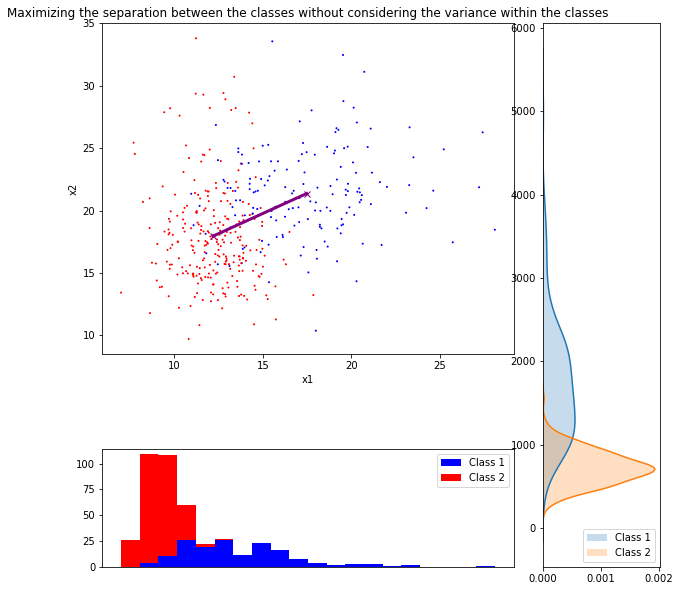

In [5]:
temp1 = data_train[data_train[columns[-1]] == 0]
m1 = temp1[columns[0:-1]].mean(axis=0)
temp2 = data_train[data_train[columns[-1]] == 1]
m2 = temp2[columns[0:-1]].mean(axis=0)
N1 = temp1.shape[0]
N2 = temp2.shape[0]

m1 = m1.to_numpy(np.float32)
m2 = m2.to_numpy(np.float32)

#Projecting the data
t = np.dot((m1 - m2).reshape(-1, 1), (m1 - m2).reshape(1, -1) ) 
evalue, evectors = np.linalg.eig(t)
idx = np.argmax(np.abs(evalue))#To get the location of the non zero eigenvalue
w = evectors[:, idx]
y = (np.dot(w.T, data_train[columns[0:-1]].T))

mask = (data_train[columns[-1]] == 0)
dfTemp = pd.Series(y)
var1 = dfTemp[mask]
var2 = dfTemp[~mask]

plot_clusters(data_train[columns[0:2]], m1[0:2], m2[0:2], (var1, var2), "Maximizing the separation between the classes without considering the variance within the classes")


In [6]:
mu_1 = np.mean(var1)
mu_2 = np.mean(var2)

S_1 = np.cov(var1, rowvar=False)
S_2 = np.cov(var2, rowvar=False)

p_c1 = N1/(N1+N2)
p_c2 = N2/(N1+N2)

classes_1 = np.argmax(gaussian_model(var1, S_1, S_2, mu_1, mu_2, p_c1, p_c2), axis=1)#Find the maximum probability in each row
classes_2 = np.argmax(gaussian_model(var2, S_1, S_2, mu_1, mu_2, p_c1, p_c2), axis=1)#Find the maximum probability in each row

acc_train = (np.sum(classes_1 == 0) + np.sum(classes_2 == 1))/(N1 + N2)
acc_train

0.903755868544601

In [7]:
#Accuracy of the model for prediction for the test observations
var = (np.dot(data_test[columns[0:-1]], w))
probs = gaussian_model(var, S_1, S_2, mu_1, mu_2, p_c1, p_c2)
classes = np.argmax(probs, axis=1)#Find the maximum probability in each row

acc_test = (np.sum(classes == data_test[columns[-1]]) )/len(data_test)
acc_test

0.9300699300699301

### Minimizing the variance within each class
An overlap occurred between the two classes when they were projected into 1D, this overlap can be minimized by reducing the variance within the classes. The variance of each class in the original dataset and the projected form are given in what is known as a scatter matrix which is proportional to the variance by a value of the number of observation in each class, and the equation for both forms are as follows:
\begin{align*}
&\underline{\Sigma_k} = N_k\Big(\frac{1}{N_k}\sum_{n\in C_k}(\underline{x_n} - \underline{m_k})(\underline{x_n} - \underline{m_k})^T\Big)\\
&\Sigma_k = N_k\Big(\frac{1}{N_k}\sum_{n\in C_1} (y_n - m_k)(y_n - m_k)^T\Big) = \sum_{n\in C_1} (\underline{w}^T\underline{x_n} - \underline{w}^T\underline{m_k})(\underline{w}^T\underline{x_n} - \underline{w}^T\underline{m_k})^T = \underline{w}^T\underline{\Sigma_k}\underline{w}
\end{align*}
From the law of total variance, we can decompose the variance of our density into the variance between classes plus the variance within the classes. And this can be expresses as follows:- var(X) = E$[var(X|C)]$ + var(E$[X|C]$). The Fisher' method denote the variance between classe by $S_B$ and the variance within the classes as $S_W$. The equation of these two can be seen from the following:-
\begin{align*}
&\underline{S_B} = \big( \underline{m1} - \underline{m2}\big) \big( \underline{m1} - \underline{m2}\big)^T\\
&\underline{S_W} = \underline{\Sigma_1} + \underline{\Sigma_2}
\end{align*}
Where is $S_B$ resulted from maximizing the variance between the classes which is equivalent to maximizing the distance between the mean of the two classes. Our objective is to maximize the distance between the classes and we need to minimize the variance within the classes, this can be achieved by making a ratio in which the variance within the classes is in the denominator. Therefore, to achieve both objectives, we need to maximize this ratio. This ratio is expressed by this formula $\underset{\underline{w}}{\arg\max}\frac{\underline{w}^T\underline{S_B}\underline{w}}{\underline{w}^T\underline{S_W}\underline{w}}$.

This objective can be interpreted using lagrangian function in which we want to maximize the nominator and constraining the denominator to be equal to 1. Also, as can be seen both the nominator and denominator are scalar which indicate that we can use the trick of the trace function that was discussed previously. This is summarized as follows:-
\begin{align*}
&L(\underline{w}) = \underline{w}^T\underline{S_B}\underline{w} + \lambda(1 - \underline{w}^T\underline{S_W}\underline{w}) \rightarrow \lambda\underline{w} = \underline{S_W}^{-1}\underline{S_B}\underline{w} 
\end{align*}
As can be seen from the above formula, we need to find the eigenvector that correspond to the non-zero eigenvalue. Also, as we mentioned before there would be only a single non-zero eigenvalue for the outer product that formed $S_B$. And this holds due to the property of $rank(A*B)\leq min(rank(A), rank(B)) $


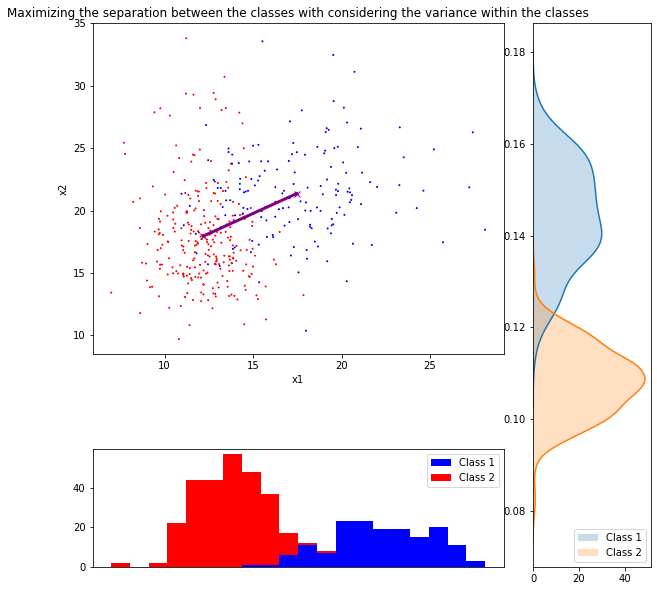

In [8]:
temp1 = data_train[data_train[columns[-1]] == 0]
N1 = temp1.shape[0]
m1 = temp1[columns[0:-1]].mean(axis=0)
temp2 = data_train[data_train[columns[-1]] == 1]
N2 = temp2.shape[0]
m2 = temp2[columns[0:-1]].mean(axis=0)

m1 = m1.to_numpy(np.float32)
m2 = m2.to_numpy(np.float32)
Xn1 = temp1[columns[0:-1]].to_numpy(np.float32)
Xn2 = temp2[columns[0:-1]].to_numpy(np.float32)

S_B = np.outer((m1 - m2), (m1 - m2)) 

sigma_1 = np.zeros((Xn1.shape[1], Xn1.shape[1]))
temp = np.zeros((Xn1.shape[1], Xn1.shape[1]))
for t in range(0, Xn1.shape[0]):
    #print(t)
    temp = np.subtract(Xn1[t, :].reshape(1, -1), m1.reshape(1, -1))
    sigma_1 = sigma_1 + np.outer(temp, temp)
sigma_1 = sigma_1

sigma_2 = np.zeros((Xn1.shape[1], Xn1.shape[1]))
temp = np.zeros((Xn1.shape[1], Xn1.shape[1]))
for t in range(0, Xn2.shape[0]):
    temp = np.subtract(Xn2[t, :].reshape(1, -1), m2.reshape(1, -1))
    sigma_2 = sigma_2 + np.outer(temp, temp)
sigma_2 = sigma_2


assert(sigma_2.shape == (num_features, num_features))
assert(sigma_1.shape == (num_features, num_features))
S_W = np.add(sigma_1, sigma_2)

#Projecting the data
#t = np.dot(np.linalg.inv(S_W), S_B)
t = np.dot(np.linalg.inv(S_W), m1 -m2)
#evalue, evectors = np.linalg.eig(t)
#idx = np.argmax(np.abs(evalue))#To get the location of the non zero eigenvalue
#w =evectors[:, idx]
w = t
y = (np.dot(data_train[columns[0:-1]], w))
mask = (data_train[columns[-1]] == 0)
dfTemp = pd.Series(y)
var1 = dfTemp[mask]
var2 = dfTemp[~mask]

plot_clusters(data_train[columns[0:2]], m1[0:2], m2[0:2], (var1, var2), "Maximizing the separation between the classes with considering the variance within the classes")

### Classification Part
After maximizing the separating between the two projected classes, now, comes the part of classification of new observation. To do this we need to discriminate between the classes by modeling the density function of a class given the input vector. Instead of explicit modeling for this density function, we will model it implicitly by utilizing the Bayes' theorem $\rightarrow p(C_k|\underline{x}) = \frac{p(\underline{x}|C_k)p(C_k)}{p(\underline{x})}$, where is p(x) is the marginalize distribution across the joint distribution of the input space and the classes. And p(Ck) is just the fraction of observations in the $k^{th}$ class. The likelihood function is assumed to be normally distributed in which each observation is assumed to i.i.d, and because it is not necessarily normalized, we normalized it using p(x). This is represented as follows:-
\begin{align*}
&p(X|C_k) = \prod_{n=1}^{N} \mathcal{N}(x_n|C_k;\mu, \Sigma),\ in\ which\ this\ would\ be\ a\ univariate\ Gaussian\ because\ \underline{x}=y\ which is\ \ the\ projected\ value\\
&\mu = \frac{1}{N}\sum_{n=1}^{N}\underline{x_n}\\
&\Sigma =\frac{1}{N}\sum_{n=1}^{N}(\underline{x_n} - \underline{\mu})(\underline{x_n} - \underline{\mu})^T
\end{align*}
After modeling the conditional probability, we choose the class of the observation according to highest probability between the two classes.


In [9]:
mu_1 = np.mean(var1)
mu_2 = np.mean(var2)

S_1 = np.cov(var1, rowvar=False)
S_2 = np.cov(var2, rowvar=False)

p_c1 = N1/(N1+N2)
p_c2 = N2/(N1+N2)

classes_1 = np.argmax(gaussian_model(var1, S_1, S_2, mu_1, mu_2, p_c1, p_c2), axis=1)#Find the maximum probability in each row
classes_2 = np.argmax(gaussian_model(var2, S_1, S_2, mu_1, mu_2, p_c1, p_c2), axis=1)#Find the maximum probability in each row

acc_train = (np.sum(classes_1 == 0) + np.sum(classes_2 == 1))/(N1 + N2)
acc_train
        


0.971830985915493

In [10]:
#Accuracy of the model for prediction for the test observations
var = (np.dot(data_test[columns[0:-1]], w))
probs = gaussian_model(var, S_1, S_2, mu_1, mu_2, p_c1, p_c2)
classes = np.argmax(probs, axis=1)#Find the maximum probability in each row

acc_test = (np.sum(classes == data_test[columns[-1]]) )/len(data_test)
acc_test


0.972027972027972

### References 
* Chapter 1, chapter 4 and Appendix E from Bishop, C. (2006). Pattern Recognition and Machine Learning. Cambridge: Springer.
* Ali Ghodsi, Lec 4: PCA,Fisher's Discriminant Analysis (FDA) (https://www.youtube.com/watch?v=hGKt0yy9q_E)